<a href="https://colab.research.google.com/github/wound-ai/Wound-AI/blob/main/models/densenet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *
from fastai.callback.fp16 import *
import torch
import os
import shutil

In [ ]:
! kaggle datasets download -d sshikamaru/lyme-disease-rashes

Dataset URL: https://www.kaggle.com/datasets/sshikamaru/lyme-disease-rashes
License(s): copyright-authors
 93% 134M/143M [00:01<00:00, 96.3MB/s]
100% 143M/143M [00:01<00:00, 84.3MB/s]


In [ ]:
! unzip -q ./lyme-disease-rashes.zip

In [ ]:
! kaggle datasets download -d moonfallidk/bug-bite-images

Dataset URL: https://www.kaggle.com/datasets/moonfallidk/bug-bite-images
License(s): apache-2.0
 71% 17.0M/24.0M [00:00<00:00, 73.9MB/s]
100% 24.0M/24.0M [00:00<00:00, 91.3MB/s]


In [ ]:
! unzip -q ./bug-bite-images.zip

In [ ]:
! kaggle datasets download -d ibrahimfateen/wound-classification

Dataset URL: https://www.kaggle.com/datasets/ibrahimfateen/wound-classification
License(s): unknown
 91% 82.0M/89.8M [00:00<00:00, 106MB/s] 
100% 89.8M/89.8M [00:00<00:00, 101MB/s]


In [ ]:
! unzip -q ./wound-classification.zip

In [ ]:
#adjustments
shutil.move('/content/RashData/RashData/Lyme_Positive_By_Diease/EMRash', '/content/training')

'/content/training/EMRash'

In [ ]:
os.rename('/content/training/mosquitos bites', '/content/training/Mosquito Bites')
os.rename('/content/training/no bites', '/content/training/No Bites')
os.rename('/content/training/tick bites', '/content/training/Tick Bites')
os.rename('/content/training/spider bites', '/content/training/Spider Bites')

In [ ]:
os.rename('/content/training/em rash', '/content/training/Em Rash')

In [ ]:
shutil.move('/content/Wound_dataset copy/Laseration', '/content/training')
shutil.move('/content/Wound_dataset copy/Pressure Wounds', '/content/training')
shutil.move('/content/Wound_dataset copy/Surgical Wounds', '/content/training')
shutil.move('/content/Wound_dataset copy/Venous Wounds', '/content/training')

'/content/training/Venous Wounds'

In [ ]:
shutil.move('/content/training/Pressure Wounds', '/content')
shutil.move('/content/training/Surgical Wounds', '/content')
shutil.move('/content/training/Venous Wounds', '/content')

'/content/Venous Wounds'

In [ ]:
shutil.move('/content/training/Diabetic Wounds', '/content')
shutil.move('/content/training/Laseration', '/content')

'/content/Laseration'

In [ ]:
fnames = '/content/training'
print(os.listdir(fnames))

['Abrasions', 'Spider Bites', 'Cut', 'Ant Bites', 'Tick Bites', 'Mosquito Bites', 'Flea Bites', 'Bruises', 'Em Rash', 'No Bites', 'Bed Bug Bites', 'Burns', 'Chigger Bites']


In [ ]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
                   item_tfms = Resize(128),
                   batch_tfms = aug_transforms(mult=2))
dls = dblock.dataloaders(fnames, bs=32)

In [ ]:
dls.show_batch(max_n = 6, nrows = 2, unique = False)

In [ ]:
metrics = [
    accuracy,
    Precision(average='macro'),
    Recall(average='macro'),
    F1Score(average='macro'),
]
learn = vision_learner(dls, densenet121, metrics=metrics, opt_func=Adam, loss_func=CrossEntropyLossFlat()).to_fp16()

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are ex

SuggestedLRs(valley=0.0010000000474974513)

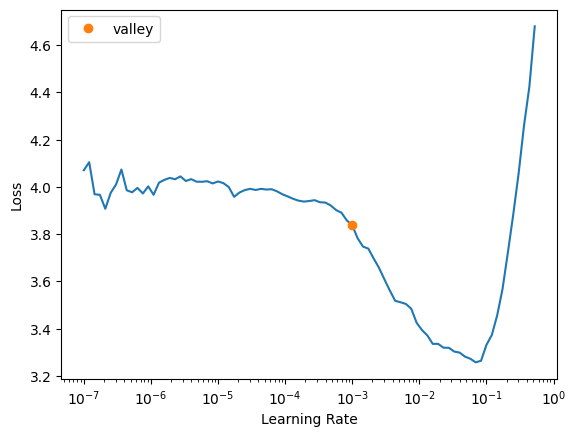

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(15, 1e-3)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,3.705306,2.496135,0.173333,0.173911,0.161651,0.160747,00:14
1,2.915459,1.404788,0.546667,0.531742,0.535800,0.518489,00:14
2,2.193627,0.975031,0.685333,0.682140,0.672112,0.668386,00:14
3,1.732997,0.981890,0.690667,0.685700,0.680196,0.670721,00:14
4,1.359835,0.805096,0.728000,0.722098,0.729565,0.716384,00:14
5,1.131783,0.725938,0.762667,0.768337,0.756728,0.753540,00:14
6,0.983167,0.615697,0.800000,0.802277,0.798177,0.794805,00:14
7,0.892876,0.593943,0.802667,0.809431,0.801914,0.797330,00:14
8,0.785268,0.601637,0.821333,0.818250,0.818969,0.812739,00:14
9,0.677651,0.572405,0.821333,0.823736,0.819115,0.816357,00:15


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

In [ ]:
learn.save('stage1 densenet121')

Path('models/stage1 densenet121.pth')

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are ex

SuggestedLRs(valley=3.630780702224001e-05)

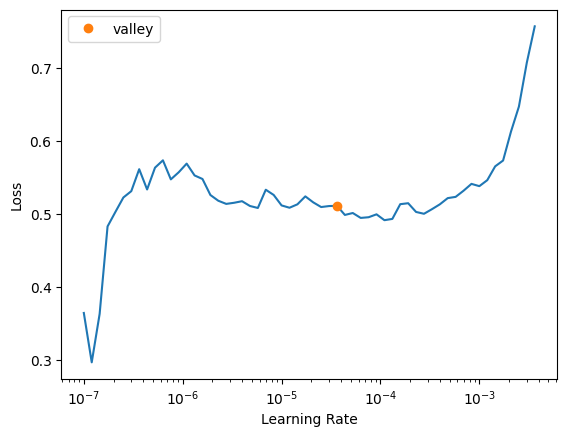

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(15, lr_max=slice(1e-6,1e-4))

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.500075,0.499019,0.848000,0.841234,0.843041,0.837467,00:17
1,0.502351,0.499255,0.842667,0.841596,0.837994,0.835704,00:16
2,0.476394,0.491450,0.845333,0.842106,0.843163,0.837985,00:15
3,0.468237,0.485539,0.845333,0.840093,0.844860,0.837942,00:15
4,0.492594,0.487433,0.845333,0.838582,0.840834,0.835560,00:16
5,0.477580,0.490078,0.834667,0.829090,0.834403,0.827642,00:15
6,0.469430,0.481277,0.850667,0.843192,0.845180,0.839502,00:16
7,0.456648,0.482700,0.848000,0.843359,0.842618,0.838038,00:15
8,0.433037,0.471167,0.837333,0.837425,0.831364,0.827954,00:16
9,0.430189,0.466284,0.845333,0.838347,0.839890,0.835020,00:16


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

In [ ]:
learn.save('stage2 densenet121')

Path('models/stage2 densenet121.pth')

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are ex

SuggestedLRs(valley=0.00013182566908653826)

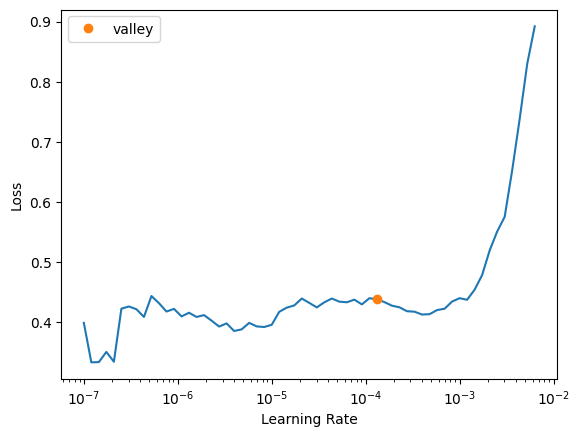

In [ ]:
learn.unfreeze()
learn.lr_find()

In [ ]:
learn.fit_one_cycle(15, 1e-4)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.370054,0.480317,0.837333,0.836906,0.832168,0.829715,00:16
1,0.400432,0.500527,0.848000,0.852115,0.843334,0.841685,00:17
2,0.426936,0.512835,0.840000,0.836222,0.835546,0.830374,00:18
3,0.421906,0.555745,0.834667,0.825069,0.833008,0.825506,00:17
4,0.433762,0.540388,0.829333,0.825355,0.826918,0.820223,00:17
5,0.410222,0.527667,0.845333,0.835433,0.843290,0.836244,00:16
6,0.388339,0.570945,0.832000,0.829411,0.826587,0.823751,00:17
7,0.351567,0.559383,0.848000,0.844815,0.847982,0.839453,00:17
8,0.332040,0.533723,0.845333,0.837641,0.843490,0.836476,00:16
9,0.296979,0.541281,0.853333,0.844393,0.850196,0.842736,00:16


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

In [ ]:
learn.save('stage3 densenet121')

Path('models/stage3 densenet121.pth')

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


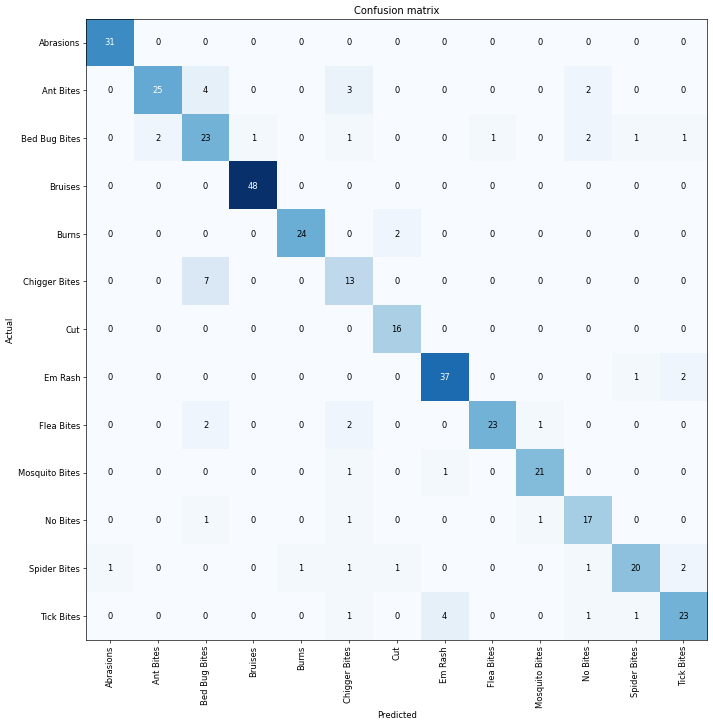

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


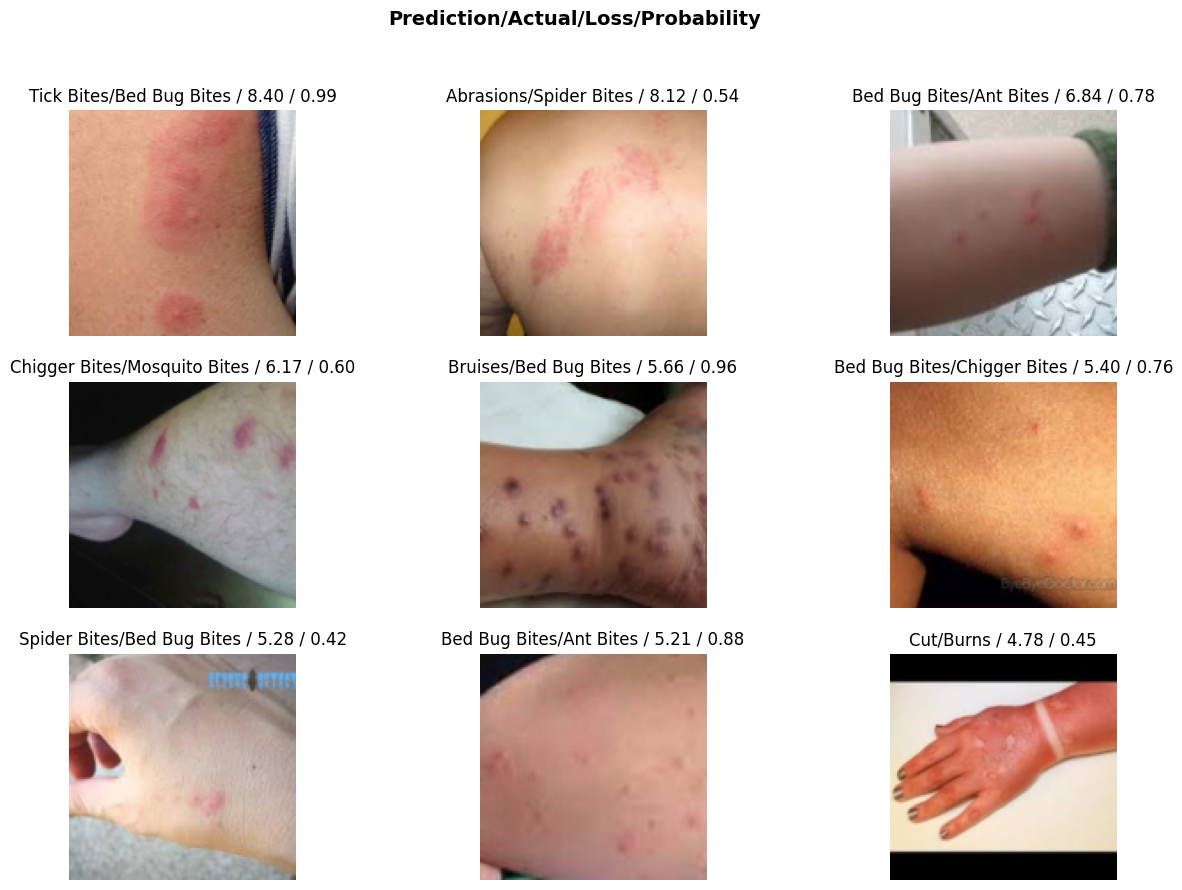

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
interp.most_confused(min_val=2)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


[('Chigger Bites', 'Bed Bug Bites', 7),
 ('Ant Bites', 'Bed Bug Bites', 4),
 ('Tick Bites', 'Em Rash', 4),
 ('Ant Bites', 'Chigger Bites', 3),
 ('Ant Bites', 'No Bites', 2),
 ('Bed Bug Bites', 'Ant Bites', 2),
 ('Bed Bug Bites', 'No Bites', 2),
 ('Burns', 'Cut', 2),
 ('Em Rash', 'Tick Bites', 2),
 ('Flea Bites', 'Bed Bug Bites', 2),
 ('Flea Bites', 'Chigger Bites', 2),
 ('Spider Bites', 'Tick Bites', 2)]

In [ ]:
interp.print_classification_report()

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


                precision    recall  f1-score   support

     Abrasions       0.97      1.00      0.98        31
     Ant Bites       0.93      0.74      0.82        34
 Bed Bug Bites       0.62      0.72      0.67        32
       Bruises       0.98      1.00      0.99        48
         Burns       0.96      0.92      0.94        26
 Chigger Bites       0.57      0.65      0.60        20
           Cut       0.84      1.00      0.91        16
       Em Rash       0.88      0.93      0.90        40
    Flea Bites       0.96      0.82      0.88        28
Mosquito Bites       0.91      0.91      0.91        23
      No Bites       0.74      0.85      0.79        20
  Spider Bites       0.87      0.74      0.80        27
    Tick Bites       0.82      0.77      0.79        30

      accuracy                           0.86       375
     macro avg       0.85      0.85      0.85       375
  weighted avg       0.86      0.86      0.86       375

